# Buiding Cost Function

Create a function that returns a locally linear value for the size of sentences based on the user studies annotation time 



In [107]:
import numpy as np
# EXample of IMDB 
kvalues = [10, 25, 50, 75, 100]
kv = [ 25, 50, 75, 100]
cost = np.array([5.7, 8.2, 10.9, 15.9, 16.7])

def fn_bin(val, x, cost):
    return min(np.digitize(val, x)[0], len(cost)-1)

def fn_cost_inter(val, x, cost):
    bin = fn_bin(val, x, cost)
    return cost[bin]

fn_cost_inter([24], kvalues, cost)

8.1999999999999993

In [61]:
np.digitize([5], [1,3,6,9])

array([2], dtype=int64)

In [62]:
np.array(kvalues[:-1]) + (np.array(kv) - np.array(kvalues[:-1]))/2

array([17, 37, 62, 87])

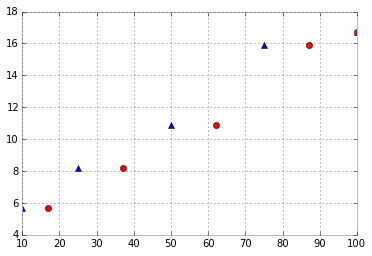

In [106]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.plot(kvalues, cost, 'b^')
plt.plot([17, 37, 62, 87,100], cost, 'ro')

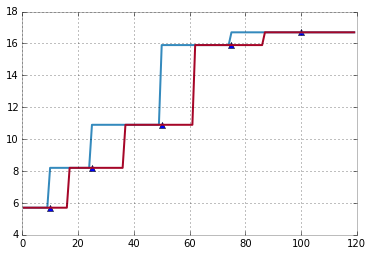

In [108]:
def fn_cost(x, fn=None, kvalues=None, cost=None):
    out = [fn([xx], kvalues, cost) for xx in x]
    return out

y = fn_cost(np.arange(0,120,1),fn=fn_cost_inter, kvalues=kvalues, cost=cost)
plt.plot(kvalues, cost, 'b^')
plt.plot(np.arange(0,120,1),y)
y = fn_cost(np.arange(0,120,1),fn=fn_cost_inter, kvalues=[17, 37, 62, 87,100], cost=cost)
plt.plot(np.arange(0,120,1),y)


In [85]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(kvalues)[[3,4]], cost[[3,4]])

print "Slope: %s, intercpet: %s, r-value: %s, p_value:%s, std:%s" % (slope, intercept, r_value, p_value, std_err)

Slope: 0.032, intercpet: 13.5, r-value: 1.0, p_value:nan, std:inf


C:\Python27\lib\site-packages\scipy\stats\stats.py:3029: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1-r*r)*ssym / ssxm / df)


In [118]:
print cost
print kvalues 
m = np.diff(np.array(cost)) / np.diff(np.array(kvalues))
print m 
b = [x[1]-m[i]*x[0] for i, x in enumerate(zip(kvalues[:-1], cost[:-1]))]

print b



[  5.7   8.2  10.9  15.9  16.7]
[10, 25, 50, 75, 100]
[ 0.16666667  0.108       0.2         0.032     ]
[4.0333333333333341, 5.4999999999999982, 0.90000000000000036, 13.500000000000004]


In [140]:
def interpolated(x, kv, cost):
    res = []
    for a in x:
        y = fn_bin([a], kvalues, cost)
        if y < (len(m)):
            res.append(b[y] + m[y] * a)
        else:
            res.append(cost[y])
            
    return res

interp = interpolated(np.arange(0,120,1), kvalues, cost)

In [189]:
def fn_int(x, cost, kvalues):
    
    binx = min(np.digitize([x], kvalues)[0], len(cost)-1)
    lbbinx = max(binx-1, 0) 
#     print binx, lbbinx
    y1 = cost[lbbinx] if lbbinx>=0  else 0
    y2 = cost[binx]
    x1 = kvalues[lbbinx] if lbbinx >=0 else 0
    x2 = kvalues[binx]
#     print x1,x2,y1,y2
    
    m = (y2-y1) / (x2-x1)
    b = y2 - m * x2
    
    if x < kvalues[0]:
        y = cost[0]
    elif x > kvalues[-1] :
        y = cost[-1]
    else:
        y = (m * x) + b
    return y

print fn_int(0, cost, kvalues)

5.7


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars


In [163]:
print kvalues
print cost
print [fn_int(xx, cost, kvalues) for xx in range(10,26,1)]

[10, 25, 50, 75, 100]
[  5.7   8.2  10.9  15.9  16.7]
[3.2799999999999994, 3.6079999999999997, 3.9359999999999995, 4.2639999999999993, 4.5919999999999996, 4.919999999999999, 5.2479999999999993, 5.5759999999999996, 5.903999999999999, 6.2319999999999993, 6.5599999999999987, 6.887999999999999, 7.2159999999999993, 7.5439999999999987, 7.871999999999999, 8.1999999999999993]


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars


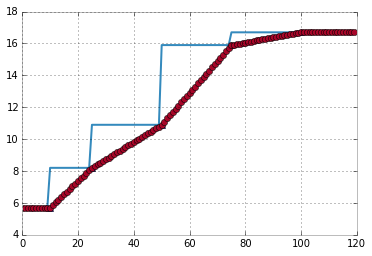

In [192]:
y = fn_cost(np.arange(0,120,1),fn=fn_cost_inter, kvalues=kvalues, cost=cost)
plt.plot(kvalues, cost, 'b^')
plt.plot(np.arange(0,120,1),y)
# y = fn_cost(np.arange(0,120,1),fn=fn_cost_inter, kvalues=[17, 37, 62, 87,100], cost=cost)
# plt.plot(np.arange(0,120,1),y)
plt.plot(np.arange(0,120,1), [fn_int(xx, cost, kvalues) for xx in range(0,120,1)], 'o')

# Quantify Q+ and Q- on Documents

How many times, how common is to have sentiment of both classes in one document
How common it is to pick pos and negative when k=2

In [103]:
import sys
import os
sys.path.append(os.path.abspath('C:/cygwin/home/mramire8/python_code/sr/active'))
sys.path.append(os.path.abspath('/Users/maru/MyCode/sr/active'))

from sklearn import linear_model

from datautil.textutils import StemTokenizer
from datautil.load_data import *

from time import time
import pickle

mpl.style.use('bmh')

## Get the data ready
imdb_path = 'C:/Users/mramire8/Documents/Research/Oracle confidence and Interruption/dataset/aclImdb/raw-data'
# imdb_path = '/Users/maru/MyCode/data/imdb'

categories = [['alt.atheism', 'talk.religion.misc'],
              ['comp.graphics', 'comp.windows.x'],
              ['comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware'],
              ['rec.sport.baseball', 'sci.crypt']]

vct = CountVectorizer(encoding='latin-1', min_df=5, max_df=1.0, binary=True, ngram_range=(1, 3),
                      token_pattern='\\b\\w+\\b', tokenizer=StemTokenizer())



In [194]:

imdb = load_dataset("imdb", 100, categories[0], vct, 100, raw=True,  percent=.5, keep_subject=True)
# sraa = load_dataset("aviation", 100, categories[0], vct2, 100, raw=True,  percent=.5, keep_subject=True)

# data = load_dataset('imdb', None, categories[0], vct, 100, percent=.5, keep_subject=True)


In [197]:
imdb.train.bow = vct.fit_transform(imdb.train.data)

In [199]:
oracle = linear_model.LogisticRegression(penalty='l1', C=0.3)
oracle.fit(imdb.train.bow, imdb.train.target)

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [200]:
imdb.test.bow = vct.transform(imdb.test.data)

In [209]:
import nltk

def test_qmax(k, data, ora, vct):
    sent_tk = nltk.data.load('tokenizers/punkt/english.pickle')
    d_sent = sent_tk.tokenize_sents(data.data[:5])
    d_q = []
    d_max = []
    counts = []
    for sents in d_sent:
        bow = vct.transform(sents)
        probs = ora.predict_proba(bow)
        
        top = probs.argsort()[::-1][:k]
        d_max.append(top)
        d_q.append(probs[top])
        cls = probs[top] >0.5
        counts.append(cls[0] != cls[1])
    return d_max, d_q, counts

dm, dq, cts = test_qmax(2, imdb.test, oracle, vct )
print dm, dq, cts


[array([[1, 0],
       [0, 1]], dtype=int64), array([[1, 0],
       [1, 0]], dtype=int64), array([[0, 1],
       [1, 0]], dtype=int64), array([[1, 0],
       [0, 1]], dtype=int64), array([[1, 0],
       [0, 1]], dtype=int64)] [array([[[ 0.59287696,  0.40712304],
        [ 0.83494726,  0.16505274]],

       [[ 0.83494726,  0.16505274],
        [ 0.59287696,  0.40712304]]]), array([[[ 0.62837689,  0.37162311],
        [ 0.39915111,  0.60084889]],

       [[ 0.62837689,  0.37162311],
        [ 0.39915111,  0.60084889]]]), array([[[ 0.53578038,  0.46421962],
        [ 0.66122826,  0.33877174]],

       [[ 0.66122826,  0.33877174],
        [ 0.53578038,  0.46421962]]]), array([[[ 0.22941931,  0.77058069],
        [ 0.43768467,  0.56231533]],

       [[ 0.43768467,  0.56231533],
        [ 0.22941931,  0.77058069]]]), array([[[ 0.34212943,  0.65787057],
        [ 0.49815433,  0.50184567]],

       [[ 0.49815433,  0.50184567],
        [ 0.34212943,  0.65787057]]])] [array([[False, False],
    

In [214]:
print dm[0].shape

(2L, 2L)


In [225]:
def get_sentences_k(sentences, k):
    import itertools as it
    
    all_sents = []
    for i in range(1,k+1):
        pairs = it.combinations(sentences, i)
        all_sents.extend(["-".join(p) for p in pairs])
    return all_sents

def get_sentences(doc, k):
    sent_tk = nltk.data.load('tokenizers/punkt/english.pickle')
    d_sent = sent_tk.tokenize_sents([doc])
    return get_sentences_k(d_sent[0], k)

get_sentences('uno, dos. tres, cuatro', 3)

['uno, dos.', 'tres, cuatro', 'uno, dos.-tres, cuatro']

In [222]:
sent_tk = nltk.data.load('tokenizers/punkt/english.pickle')
sent_tk.tokenize_sents(['uno. dos. tres. cuatro.'])

[['uno.', 'dos.', 'tres.', 'cuatro.']]

# Extrapolating Cost on X-axis



In [280]:
def extrapolate_trials(trials, cost_25=8.2, step_size=10):
    from collections import defaultdict
    cost_delta = cost_25 * step_size  # Cost of 25 words based on user study

    extrapolated = defaultdict(lambda: [])

    for t, data in enumerate(trials):
        # print("j:%s" % j)
        trial_data = np.array(data)
        # print trial_data
        i = 0
        current_c = np.ceil(trial_data[0, 0] / cost_delta) * cost_delta
        print np.ceil(trial_data[0, 0]/ cost_delta), cost_delta
        # print "starting at %s ending at %s" % (current_c, trial_data.shape[0])
        print "TRIAL %s" % (t)
        while i < trial_data.shape[0] - 1:  # while reaching end of rows
            print "Poinst:%s" % i
            a = trial_data[i]
            a1 = trial_data[i + 1]
#             print("P1:{0}\t{2}\tP2{1}".format(a,a1,current_c))
            print "%s <= %s <= %s " % (a[0] <= current_c , current_c <=a1[0], a[0] <= current_c <= a1[0])
            if a[0] <= current_c <= a1[0]:
                m = (a1[1] - a[1]) / (a1[0] - a[0]) * (current_c - a[0])
                z = m + a[1]
                extrapolated[current_c].append((t, z))
                # np.append(extrapolated, [current_c,z])
                print("a1:{0},m:{1}".format(a[1], m))
                print("{0},z:{1}".format(current_c,z))
                current_c += cost_delta
            if a1[0] < current_c:
                i += 1

    return extrapolated

xt= extrapolate_trials([[[10*8.2,.7],[20*8.2,.75],[246,.82]],[[11*8.2,.65],[22*8.2,.74],[28*8.2,.85]],[[9*8.2,.7],[18*8.2,.78],[32*8.2,.81]]])

1.0 82.0
TRIAL 0
Poinst:0
True <= True <= True 
a1:0.7,m:0.0
82.0,z:0.7
Poinst:0
True <= True <= True 
a1:0.7,m:0.05
164.0,z:0.75
Poinst:1
True <= True <= True 
a1:0.75,m:0.07
246.0,z:0.82
2.0 82.0
TRIAL 1
Poinst:0
True <= True <= True 
a1:0.65,m:0.0736363636364
164.0,z:0.723636363636
Poinst:1
True <= False <= False 
1.0 82.0
TRIAL 2
Poinst:0
True <= True <= True 
a1:0.7,m:0.00888888888889
82.0,z:0.708888888889
Poinst:1
True <= True <= True 
a1:0.78,m:0.00428571428571
164.0,z:0.784285714286
Poinst:1
True <= True <= True 
a1:0.78,m:0.0257142857143
246.0,z:0.805714285714


In [281]:
print "\n".join("{} - {} - {}".format(k,v, np.mean(v)) for k,v in xt.items())


82.0 - [(0, 0.69999999999999996), (2, 0.7088888888888889)] - 0.852222222222
164.0 - [(0, 0.75), (1, 0.72363636363636363), (2, 0.78428571428571436)] - 0.87632034632
246.0 - [(0, 0.81999999999999995), (2, 0.80571428571428572)] - 0.906428571429


In [237]:
print [8.2 * i for i in range(10,31,10)]

[82.0, 164.0, 245.99999999999997]
